# Student Performance Indicator

## Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- this projects finds out how diffrent features like race, gender, parental education, type of lunch provided to student, course test done or not are effecting student test score.

### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

#### 2.1 Import Data and Required Packages

##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/stud.csv')

##### Show Top 5 Records

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Shape of the dataset

In [5]:
df.shape

(1000, 8)

#### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### 3.1 Check Missing values
- There are no missing values in the data set.

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### 3.2 Check Duplicates
- There is is no duplicate record in this dataset.

In [7]:
df.duplicated().sum()

0

#### 3.3 Check datatypes
- object: gender, race_ethnicity, parental_level_of_education, lunch, test_preparation_course 
- int64: math_score, reading_score, writing_score

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Check the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check statistics of data set
- average marks of students are more than 60% in all subjects.
- at the same time there are student/s who scored 0 mark in math, 17 for reading and 10 for writing.
- we can say 50% students scored between 50 and 80 on an avg in all subjects.

In [10]:
df.describe(exclude='int')

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [11]:
df.describe(exclude='object')

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### 3.6 Check various categories present in the different categorical column

In [12]:
{i:df[i].unique()for i in df.select_dtypes(include='object').columns}

{'gender': array(['female', 'male'], dtype=object),
 'race_ethnicity': array(['group B', 'group C', 'group A', 'group D', 'group E'],
       dtype=object),
 'parental_level_of_education': array(["bachelor's degree", 'some college', "master's degree",
        "associate's degree", 'high school', 'some high school'],
       dtype=object),
 'lunch': array(['standard', 'free/reduced'], dtype=object),
 'test_preparation_course': array(['none', 'completed'], dtype=object)}

#### 3.8 Adding columns for "Total Score" and "Average"

In [13]:
df["TotalScore"]=df.math_score+df.reading_score+df.writing_score
df["AvgTotalScore"]=df.TotalScore/3

In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,TotalScore,AvgTotalScore
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### 3.9 lets find the count of students who scored max and min in each subject.

In [15]:
print(f'count of student who scored full mark in math: {df[df.math_score==100].AvgTotalScore.count()}')
print(f'count of student who scored full mark in reading: {df[df.reading_score==100].AvgTotalScore.count()}')
print(f'count of student who scored full mark in writing: {df[df.writing_score==100].AvgTotalScore.count()}')

print()

print(f'count of student who scored {min(df.math_score)} in math: {df[df.math_score==min(df.math_score)].AvgTotalScore.count()}')
print(f'count of student who scored {min(df.reading_score)} in reading: {df[df.reading_score==min(df.reading_score)].AvgTotalScore.count()}')
print(f'count of student who scored {min(df.writing_score)} in writing: {df[df.writing_score==min(df.writing_score)].AvgTotalScore.count()}')



count of student who scored full mark in math: 7
count of student who scored full mark in reading: 17
count of student who scored full mark in writing: 14

count of student who scored 0 in math: 1
count of student who scored 17 in reading: 1
count of student who scored 10 in writing: 1


### 4. Exploring Data ( Visualization )

#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

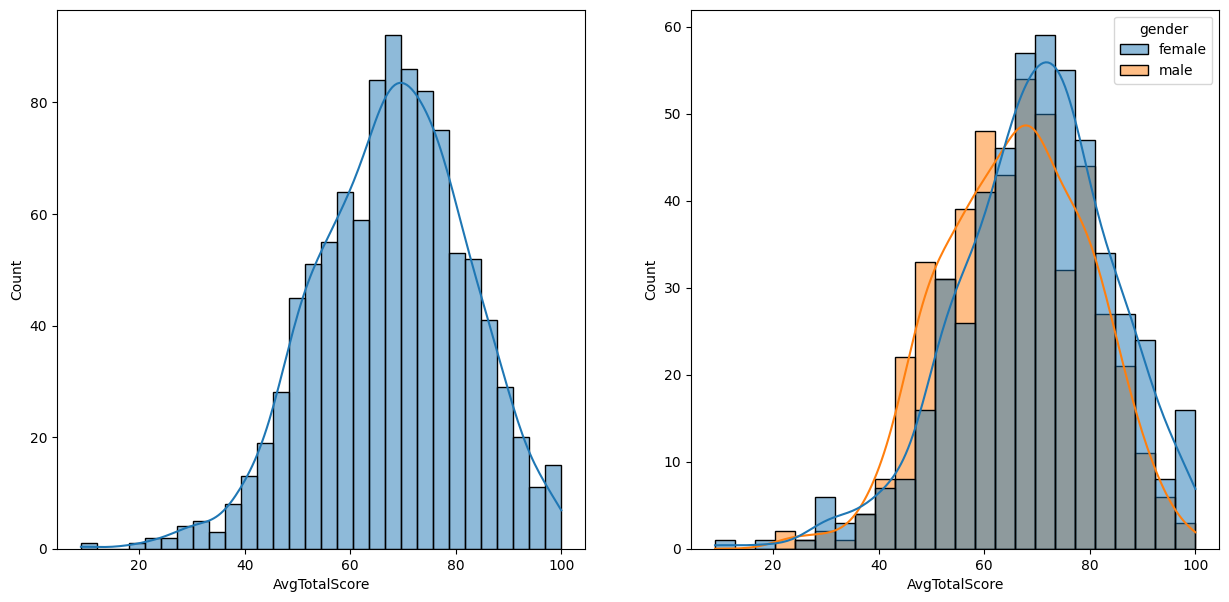

In [16]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df.AvgTotalScore,bins=30,kde=True)
plt.subplot(1,2,2)
sns.histplot(data=df,x='AvgTotalScore',kde=True,hue='gender')
plt.show()

In [17]:
df[df.AvgTotalScore<35].gender.value_counts()

gender
female    12
male       6
Name: count, dtype: int64

In [18]:
df[df.AvgTotalScore>60].gender.value_counts()

gender
female    390
male      317
Name: count, dtype: int64

#### Observation:
- Upon reviewing the data, it was observed that a higher number of girls scored above 60, and similarly, a greater number of girls scored below 35.

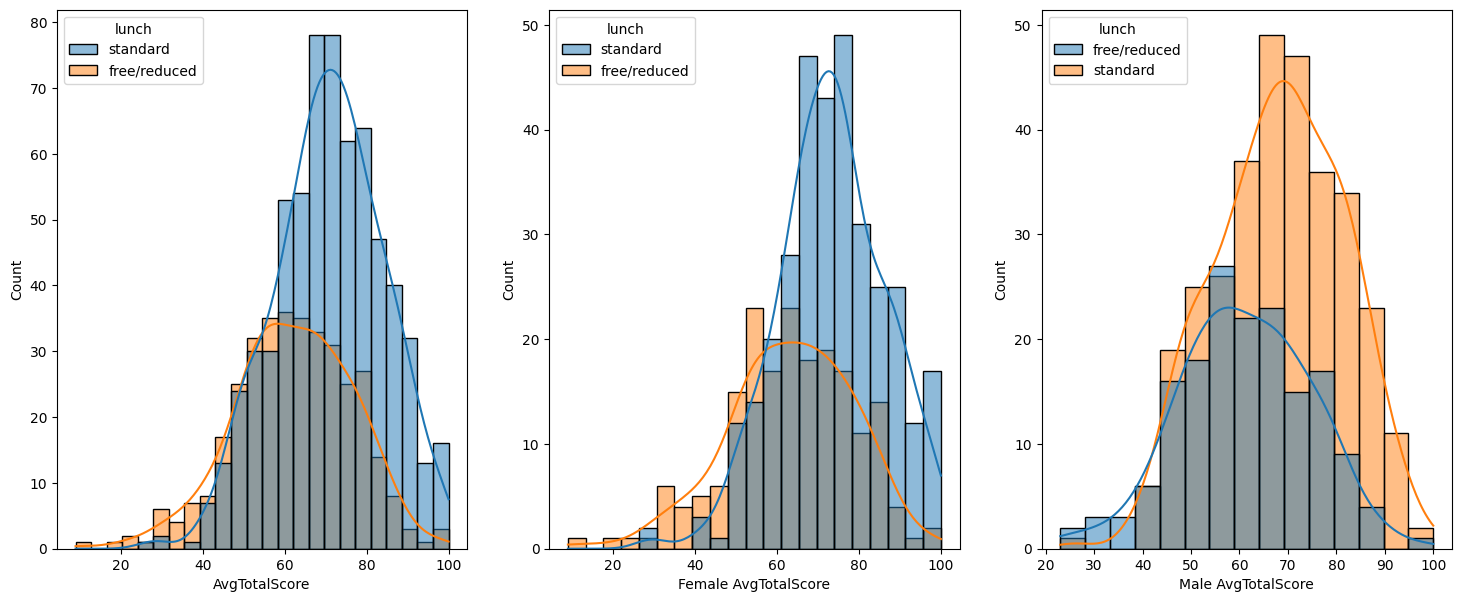

In [19]:
plt.figure(figsize=(18,7))
plt.subplot(1,3,1)
sns.histplot(data=df,x='AvgTotalScore',hue='lunch',kde=True)
plt.subplot(1,3,2)
plt.xlabel('Female AvgTotalScore')
sns.histplot(data=df[df.gender=='female'],x='AvgTotalScore',hue='lunch',kde=True)
plt.subplot(1,3,3)
plt.xlabel('Male AvgTotalScore')
sns.histplot(data=df[df.gender=='male'],x='AvgTotalScore',hue='lunch',kde=True)
plt.show()

#### Observation:
- Upon reviewing the data, it was observed that a students scored more those who had standard lunch rather than free/reduced lunch.

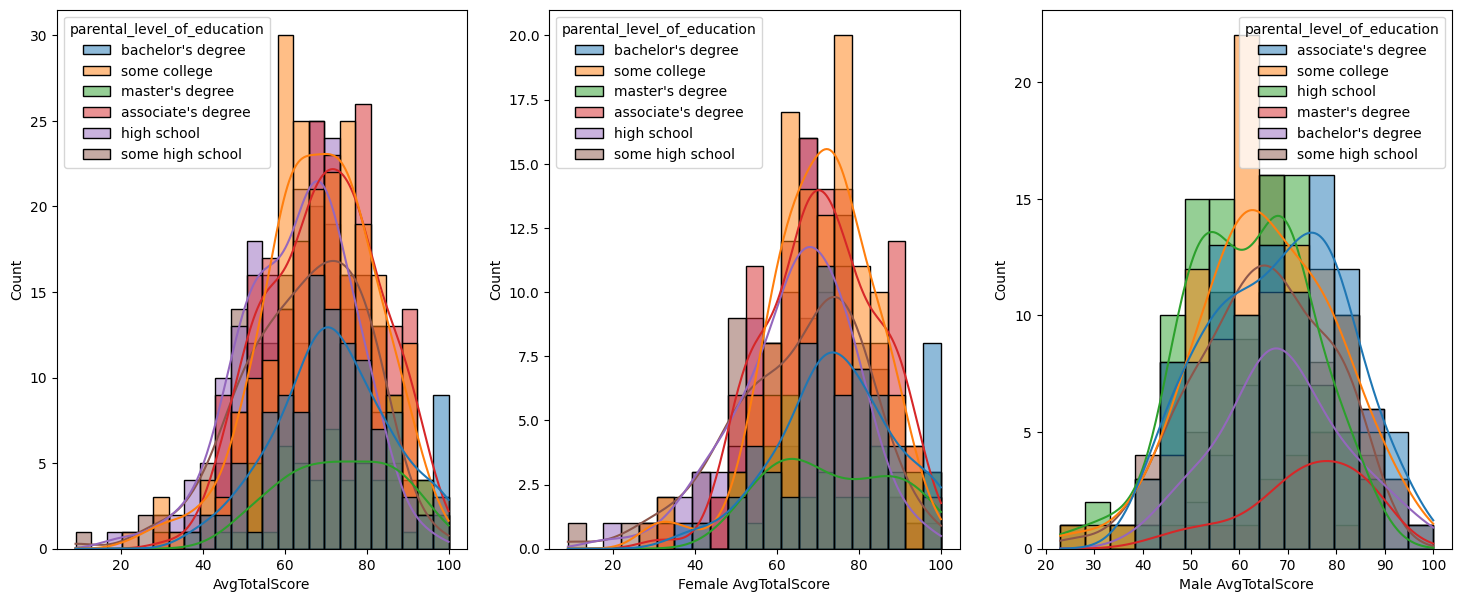

In [20]:
plt.figure(figsize=(18,7))
plt.subplot(1,3,1)
sns.histplot(data=df,x='AvgTotalScore',hue='parental_level_of_education',kde=True)
plt.subplot(1,3,2)
plt.xlabel('Female AvgTotalScore')
sns.histplot(data=df[df.gender=='female'],x='AvgTotalScore',hue='parental_level_of_education',kde=True)
plt.subplot(1,3,3)
plt.xlabel('Male AvgTotalScore')
sns.histplot(data=df[df.gender=='male'],x='AvgTotalScore',hue='parental_level_of_education',kde=True  )
plt.show()

#### Observation
- its interesting to see that students with parent having bachelors and masters have score lease compairing to other categories , this may be due to imbalance data.
- this obervation is reflecting same on girls and boys.

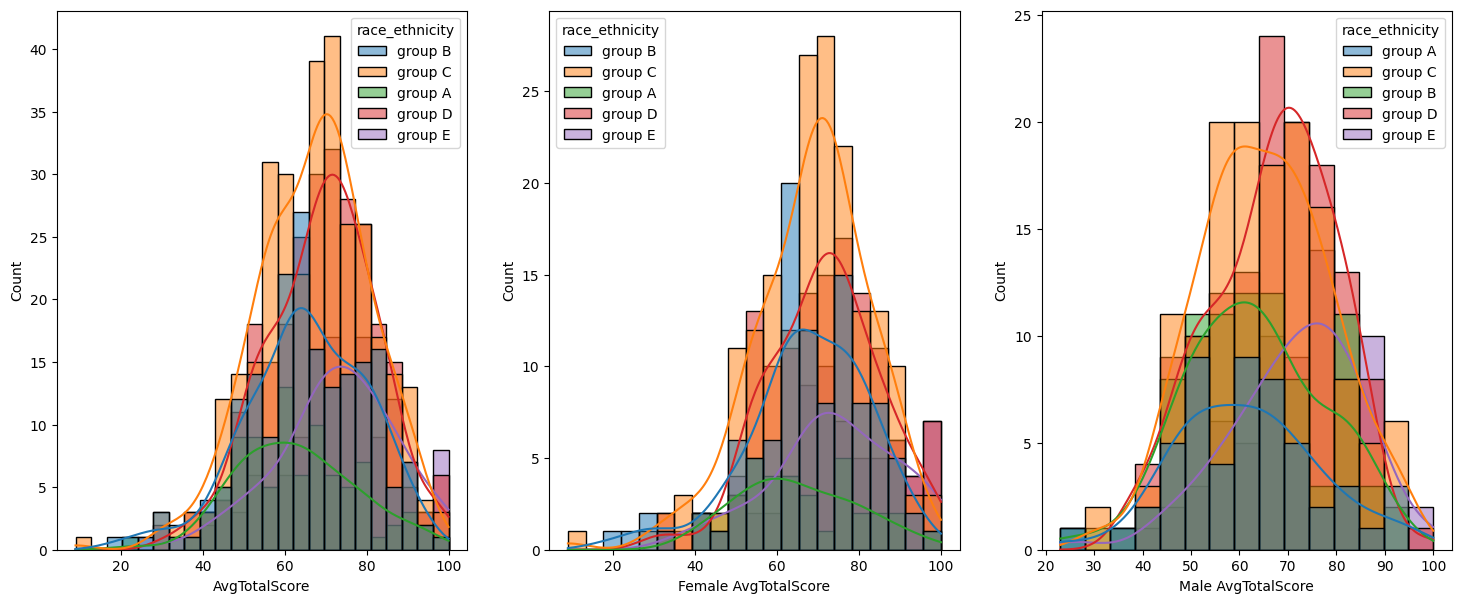

In [21]:
plt.figure(figsize=(18,7))
plt.subplot(1,3,1)
sns.histplot(data=df,x='AvgTotalScore',hue='race_ethnicity',kde=True)
plt.subplot(1,3,2)
plt.xlabel('Female AvgTotalScore')
sns.histplot(data=df[df.gender=='female'],x='AvgTotalScore',hue='race_ethnicity',kde=True)
plt.subplot(1,3,3)
plt.xlabel('Male AvgTotalScore')
sns.histplot(data=df[df.gender=='male'],x='AvgTotalScore',hue='race_ethnicity',kde=True  )
plt.show()

#### Observation
- In boys more toper are in group E and students in group D have better avg mark than other group.
- In girls topers are in group D and students in group c have better avg mark than other group.

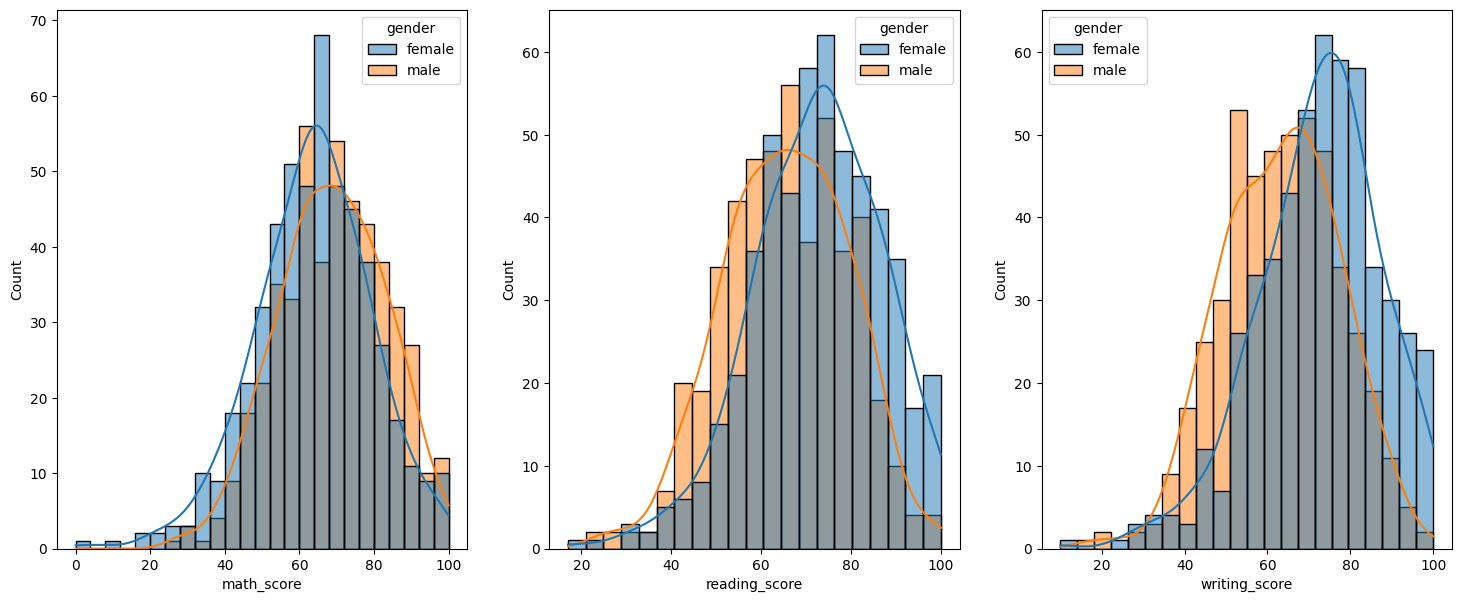

In [22]:
plt.figure(figsize=(18,7))
plt.subplot(1,3,1)
sns.histplot(data=df,x='math_score',hue='gender',kde=True)
plt.subplot(1,3,2)
plt.xlabel('reading_score')
sns.histplot(data=df,x='reading_score',hue='gender',kde=True)
plt.subplot(1,3,3)
plt.xlabel('writing_score')
sns.histplot(data=df,x='writing_score',hue='gender',kde=True  )
plt.show()

#### Observation
- Seems boys scored more mark in Maths than girls and girls have better score in reading and writing

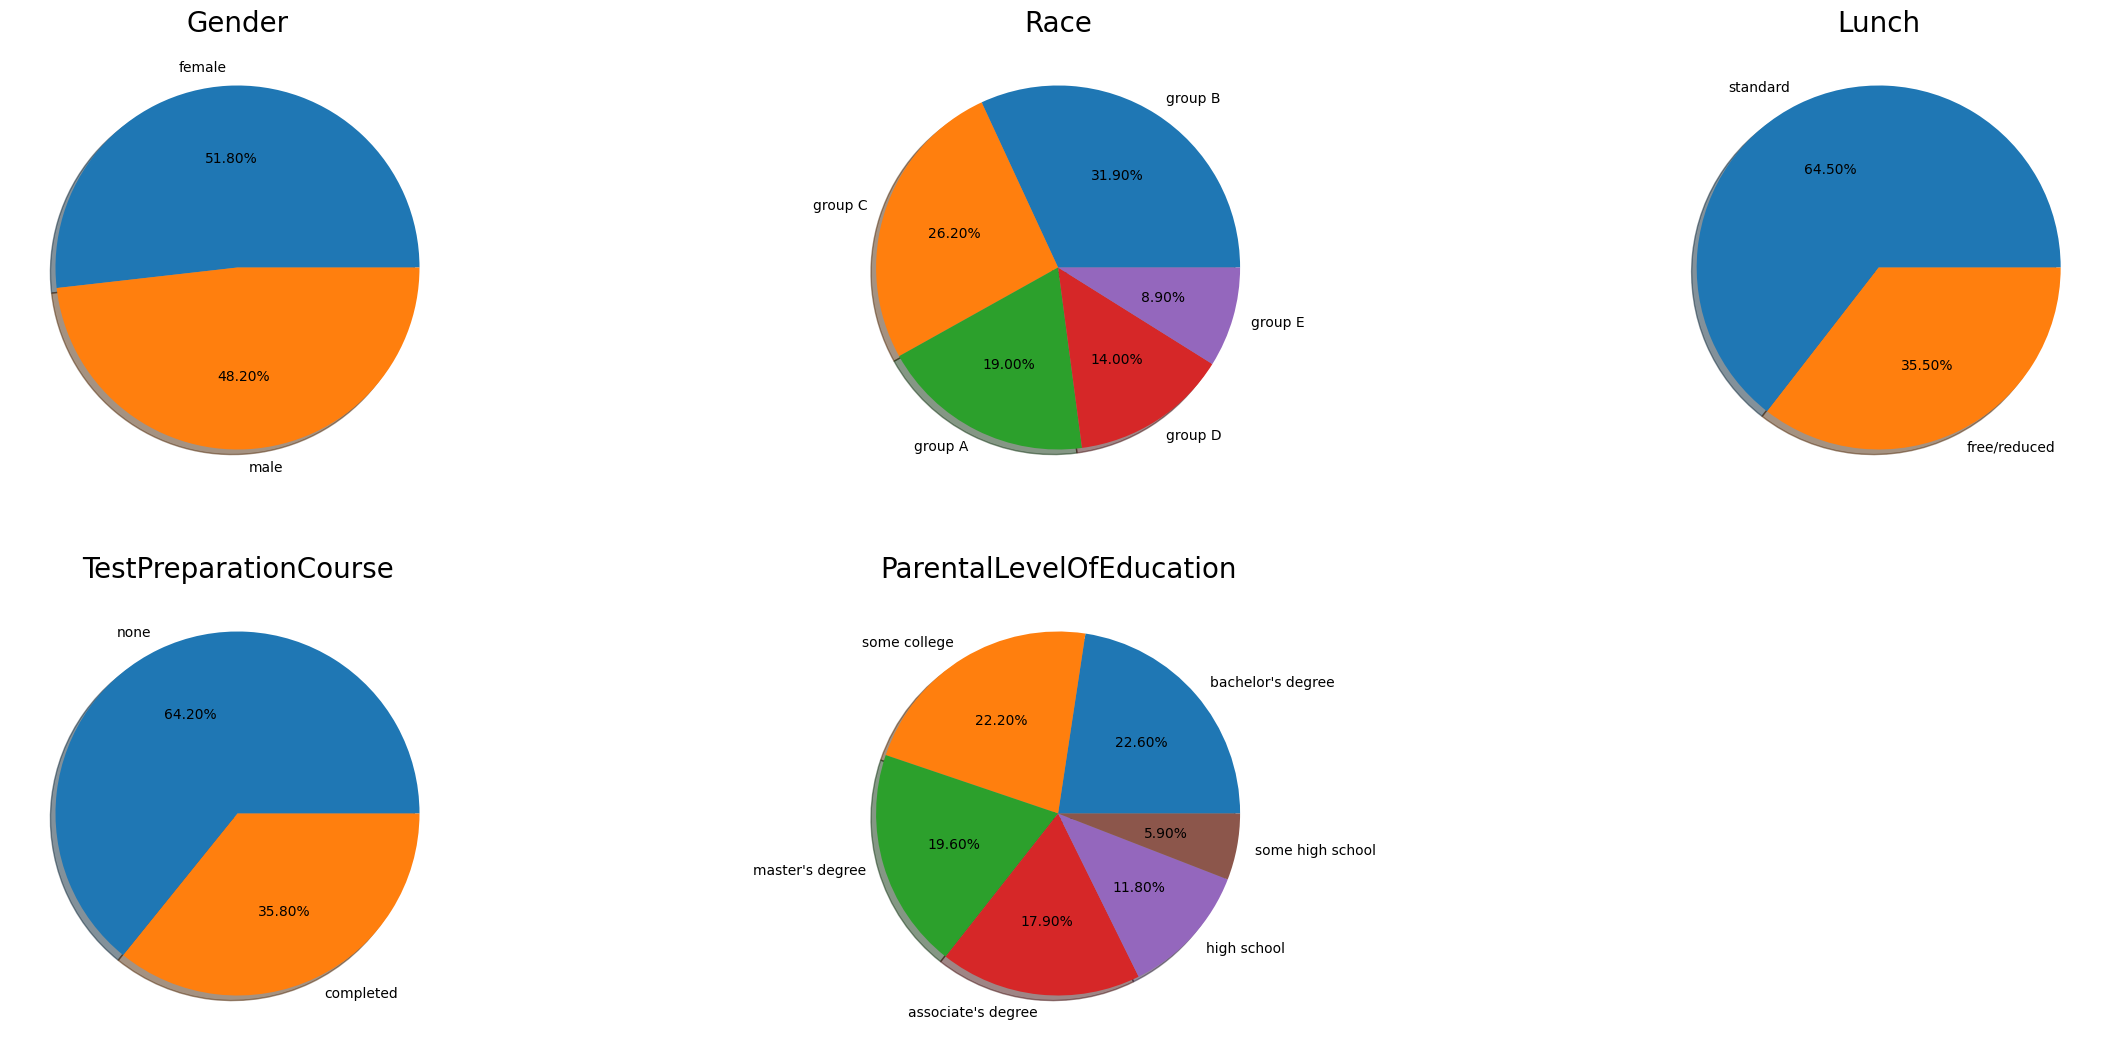

In [23]:
plt.figure(figsize=(30,13))
plt.subplot(2,3,1)
plt.pie(x=df.gender.value_counts(),labels=['female','male'],shadow=True, autopct='%1.2f%%')
plt.title('Gender', fontsize = 20)
plt.subplot(2,3,2)
plt.pie(df.race_ethnicity.value_counts(),labels=df.race_ethnicity.unique(),shadow=True, autopct='%1.2f%%')
plt.title('Race', fontsize = 20)
plt.subplot(2,3,3)
plt.pie(df.lunch.value_counts(),labels=df.lunch.unique(),shadow=True, autopct='%1.2f%%')
plt.title('Lunch', fontsize = 20)
plt.subplot(2,3,4)
plt.pie(df.test_preparation_course.value_counts(),labels=df.test_preparation_course.unique(),shadow=True, autopct='%1.2f%%')
plt.title('TestPreparationCourse', fontsize = 20)
plt.subplot(2,3,5)
plt.pie(df.parental_level_of_education.value_counts(),labels=df.parental_level_of_education.unique(),shadow=True, autopct='%1.2f%%')
plt.title('ParentalLevelOfEducation', fontsize = 20)

#plt.tight_layout()
#plt.grid()
plt.show()

#### Observation
- there is imbalance in data based on Lunch and TestPreparationCourse

In [27]:
groupbydata=df.groupby('gender')

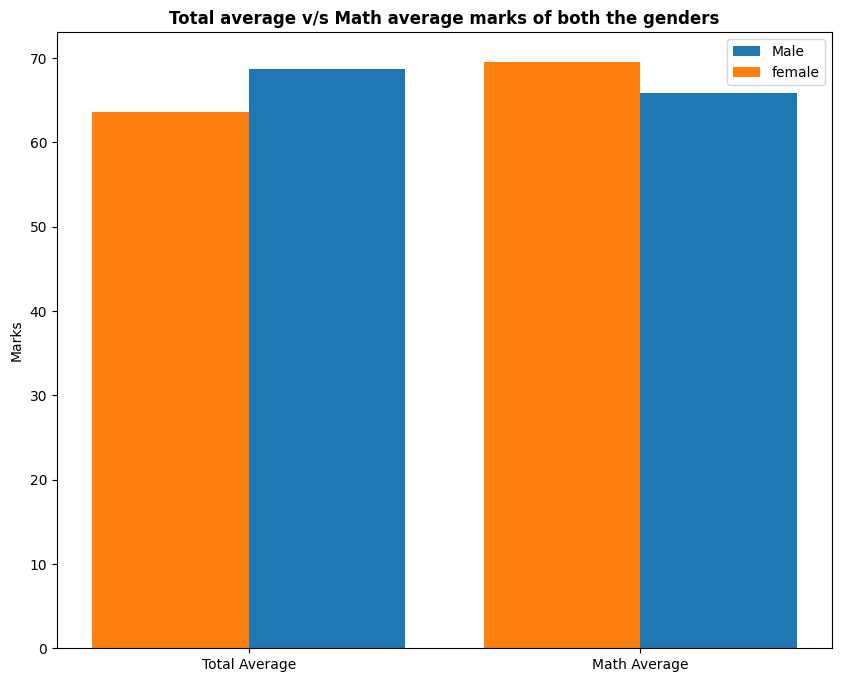

In [90]:
plt.figure(figsize=(10, 8))
X = ['Total Average','Math Average']
X_axis = np.arange(len(X))
female=[groupbydata.math_score.mean()[0],groupbydata.AvgTotalScore.mean()[0]]
male=[groupbydata.math_score.mean()[1],groupbydata.AvgTotalScore.mean()[1]]
plt.bar(np.arange(2)+.2,male,.4, label = 'Male')
plt.bar(np.arange(2)-.2,female,.4, label = 'female')
#sns.barplot(data=df,x='gender',y='writing_score')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

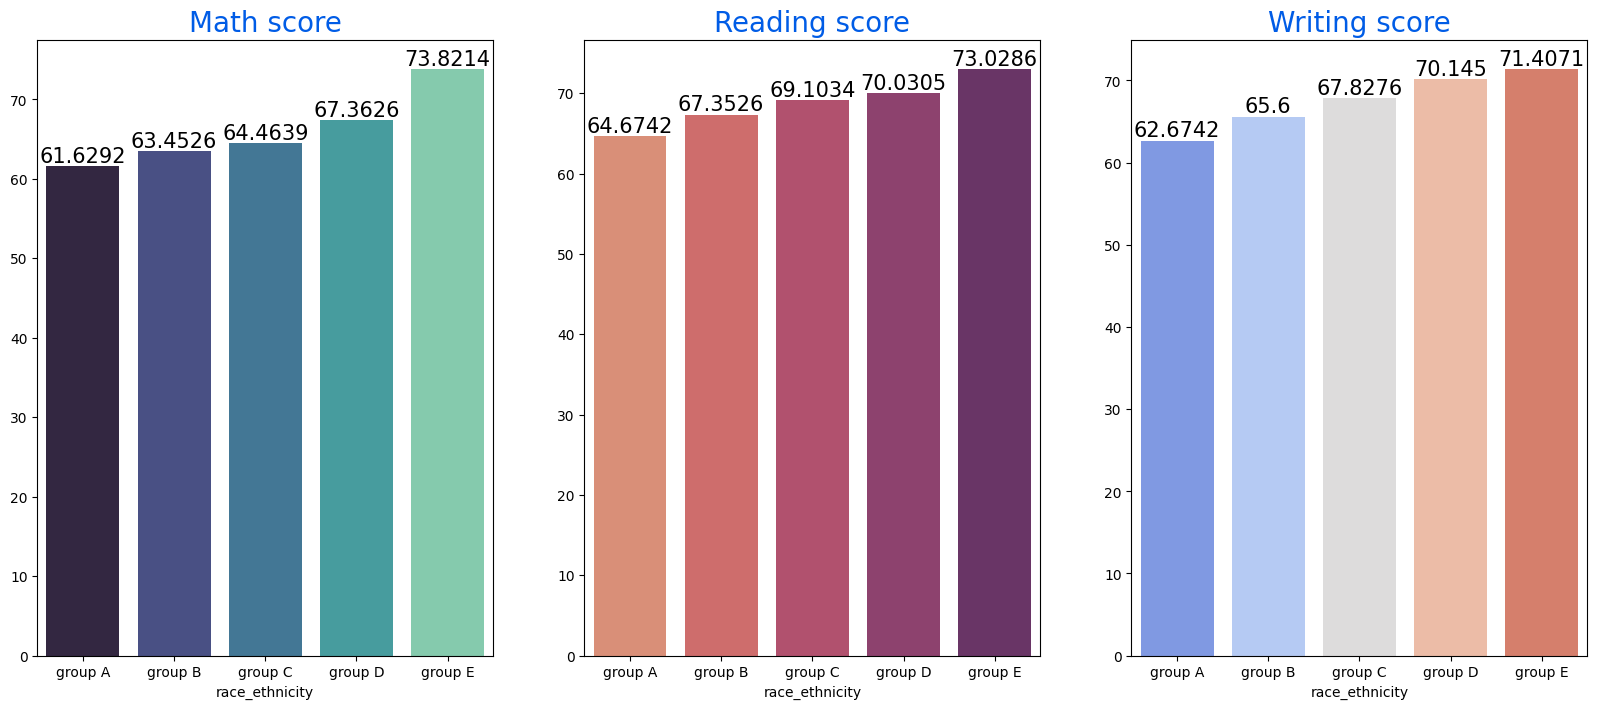

In [92]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

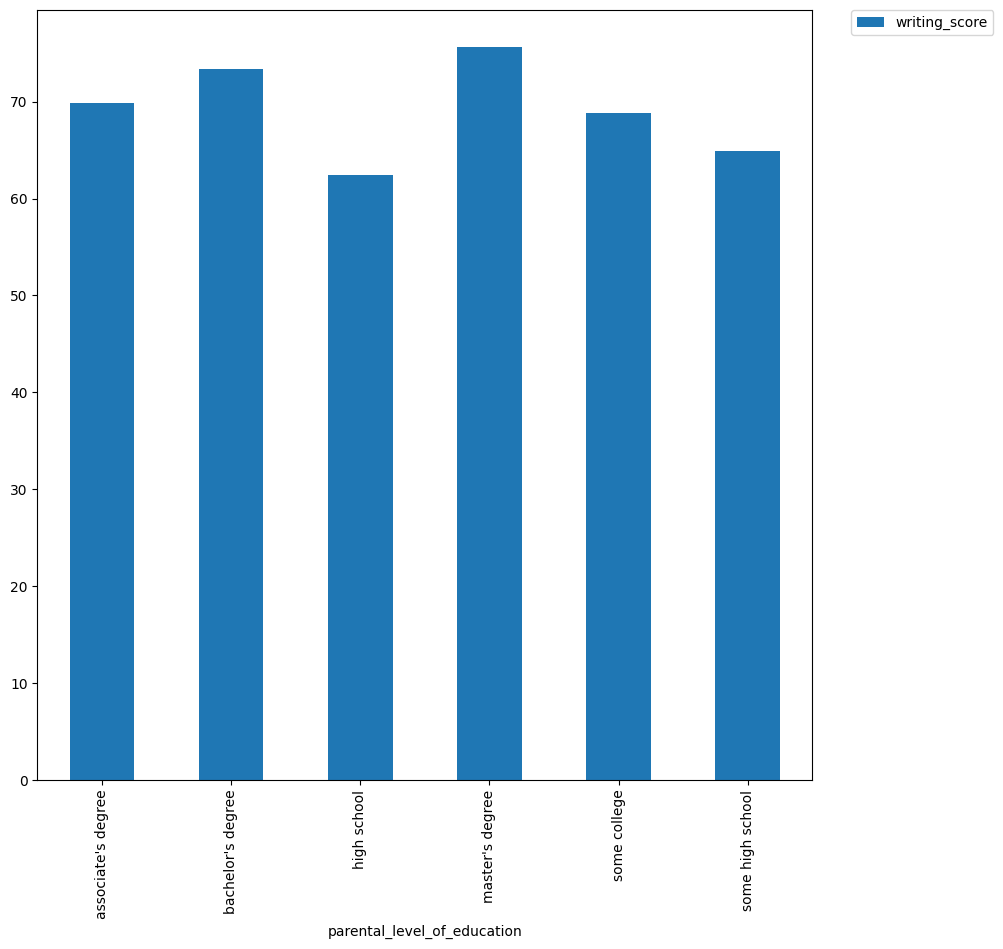

In [112]:

df.groupby('parental_level_of_education').writing_score.mean().plot(kind='bar',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


#### Observations
- better overall performance is for students whose parents who have masters's and bachelor's degree.

<Axes: >

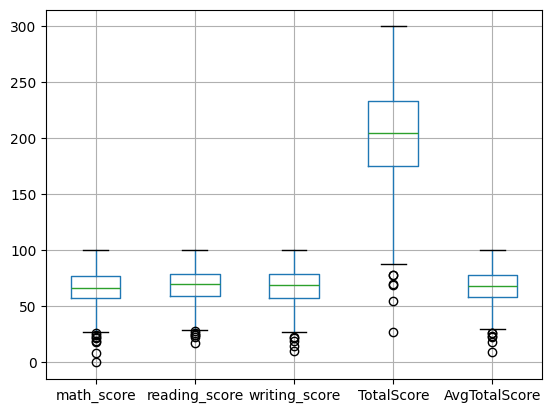

In [124]:
df.boxplot()

#### Observation
- In all subjects there are students who scored very least value so we have out liers on all subjects.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers